# Predictive Modelling - Binary Classification (Categorical Prediction - Two  Classes)

In this notebook, we use supervised machine learning algorithms to solve a  classification type prediction problem, with two classes. The dataset is on employee attrition, where we will try to predict one of two classes, Resigned or Not Resigned, using many input variables. 

## Importing libraries



Libraries are a collection of shared files (or modules) that contain functions for use by multiples programs. These allow for common functionality to be written once and repurposed as required. 

The Python [standard library](https://docs.python.org/3/library/) contains an extensive suite of modules that are built into Python by default. For additional functionality libraries are available from [PyPI](https://pypi.org/) (the Python Package Index).

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# The following two commands ignore some warnings which are generally thrown due to version updates.
import warnings
warnings.filterwarnings("ignore")

# Ex: import numpy library (as a given short name) / Here we import the entire library (called alias)
import numpy as np # Used for scientific computing and efficient multi dimensional array processing
import pandas as pd # Used for data analysis and manipulation - data frames

# Modelling utilities
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics 

# For Modelling 
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import neighbors
import xgboost as xgb
from sklearn.neural_network import MLPClassifier

# Explainability and visualisation libraries
from xgboost import plot_tree
from prettytable import PrettyTable
import matplotlib.pyplot as plt
import seaborn as sns
# install shap explainability
!pip install shap
import shap

     |████████████████████████████████| 356 kB 5.1 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491652 sha256=6eaed8e67713cea8a2f303e4e9132dbe8bf8470ace6e80d9307cdf21d3dc4db2
  Stored in directory: /root/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


It is possible that some of the libraries that you are looking import are not available in Google Colaboratory by default. In order to provision the library in the environment you can install the library using the following command.

* Installing python libraries : ```!pip install {library_name}```
* Installing system packages : ```!apt-get install {package_name}```

[reference](https://colab.research.google.com/notebooks/snippets/importing_libraries.ipynb)

## Load the dataset

In [ ]:
#Load the CSV file containing the dataset.
hr_dataset = pd.read_csv("hr.csv")
#Preview the first 5 lines of the loaded data
hr_dataset.head()

,satisfactionLevel,lastEvaluation,numberOfProjects,monthlyHours,yearsOfService,workAccident,Resigned,recentPromotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data exploration

In [ ]:
#view data types
hr_dataset.info()
#view basic stats
hr_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   satisfactionLevel  14999 non-null  float64
 1   lastEvaluation     14999 non-null  float64
 2   numberOfProjects   14999 non-null  int64  
 3   monthlyHours       14999 non-null  int64  
 4   yearsOfService     14999 non-null  int64  
 5   workAccident       14999 non-null  int64  
 6   Resigned           14999 non-null  int64  
 7   recentPromotion    14999 non-null  int64  
 8   department         14999 non-null  object 
 9   salary             14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfactionLevel,lastEvaluation,numberOfProjects,monthlyHours,yearsOfService,workAccident,Resigned,recentPromotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
#Since we are building an employee attrition model (which is an anomaly detection type problem), let's check if the dataset is imbalanced
print(hr_dataset['Resigned'].value_counts())
print(hr_dataset['Resigned'].value_counts(normalize=True))

0    11428
1     3571
Name: Resigned, dtype: int64
0    0.761917
1    0.238083
Name: Resigned, dtype: float64


## Data visualisation

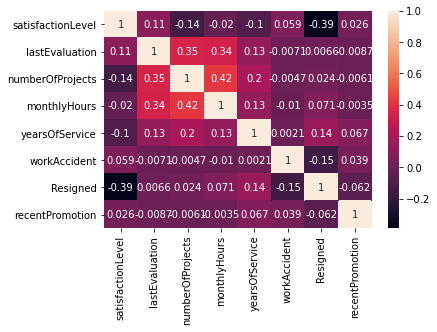

In [ ]:
#Use a dataframe function to calculate pairwise correlation 
corr_matrix = hr_dataset.corr()
# corr_matrix #- show this also

#and then use seaborn heatmap for viz
sns.heatmap(corr_matrix, annot=True)

In [ ]:
#Sort correlations by the output variable "Resigned" 
corr_matrix['Resigned'].sort_values(ascending=True)

satisfactionLevel   -0.388375
workAccident        -0.154622
recentPromotion     -0.061788
lastEvaluation       0.006567
numberOfProjects     0.023787
monthlyHours         0.071287
yearsOfService       0.144822
Resigned             1.000000
Name: Resigned, dtype: float64

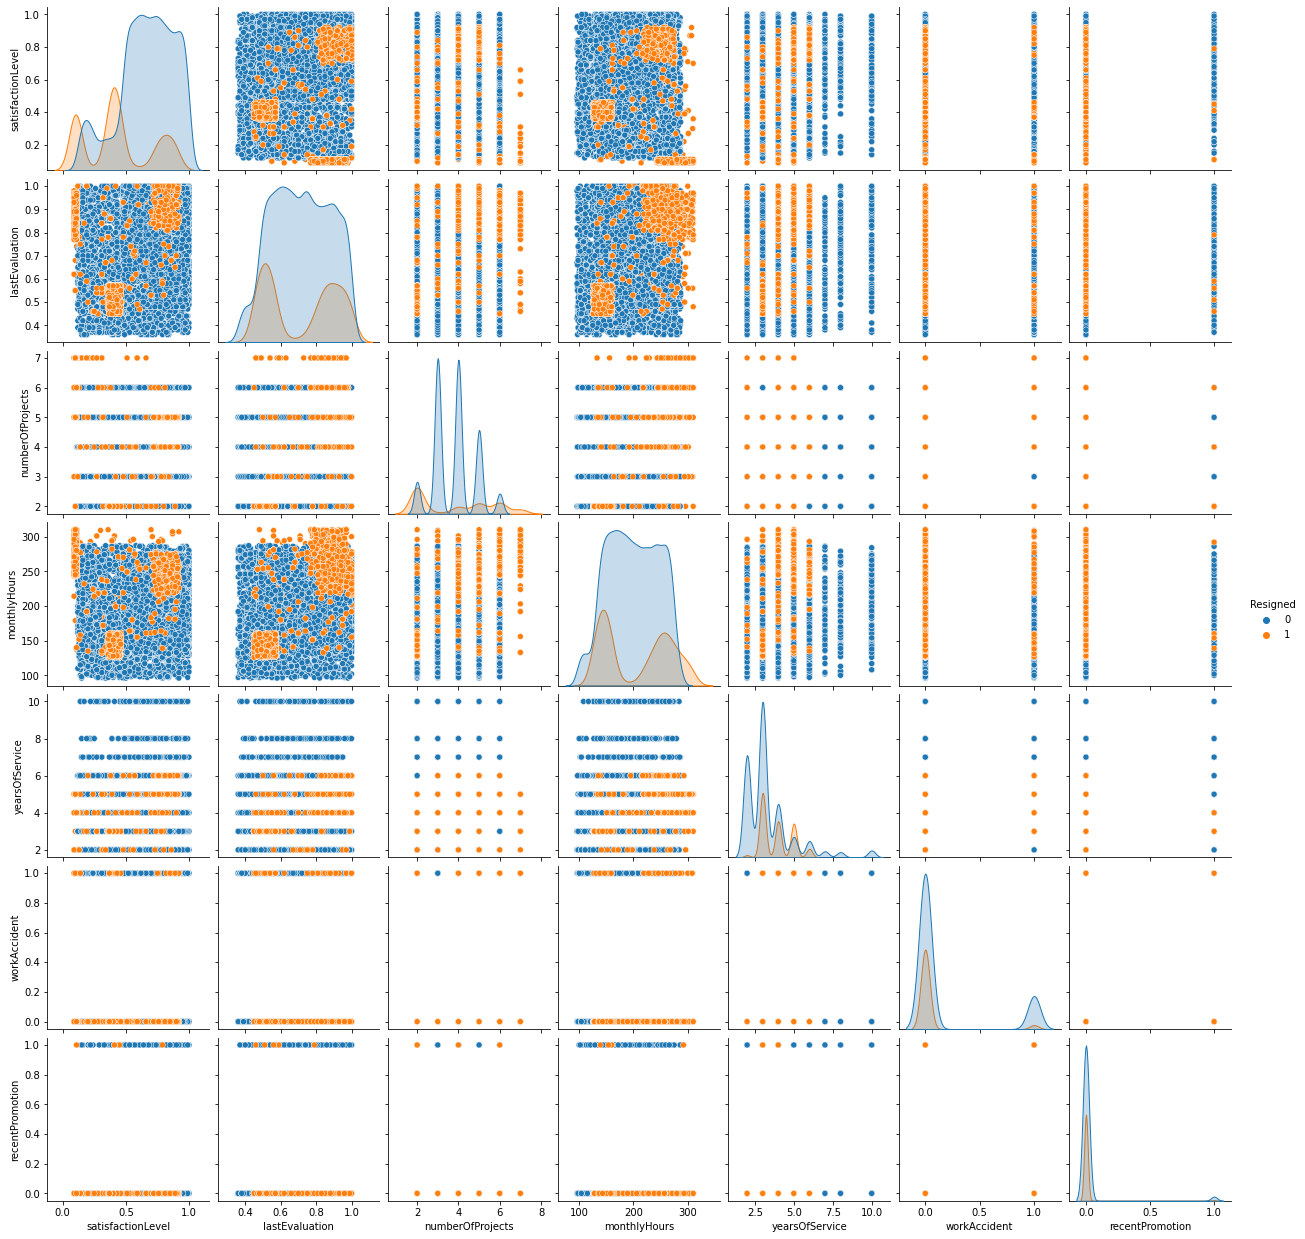

In [ ]:
sns.pairplot(data=hr_dataset, hue='Resigned')

## Data preprocessing

In [ ]:
## Department and Salary are two categorical variables that need to be preprocessed into numerical quantities that can be input to the model. 
print(hr_dataset.department.unique())
print(hr_dataset.salary.unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']


In [ ]:
#Let's use one-hot encoding to transform these categorical into numerical while preserving their relationship with the output variable. 

#view the dataset before encoding
hr_dataset.head()

# Prepend column name prior to encoding
hr_dataset['salary'] = 'salary_' + hr_dataset['salary'].astype(str)
# one hot encoding
one_hot_salary = pd.get_dummies(hr_dataset['salary'])
#append as a new column 
hr_dataset = hr_dataset.join(one_hot_salary)

hr_dataset.head()
# Prepend column name prior to encoding
hr_dataset['department'] = 'dept_' + hr_dataset['department'].astype(str)
# one hot encoding
one_hot_department = pd.get_dummies(hr_dataset['department'])
#append as a new column 
hr_dataset = hr_dataset.join(one_hot_department)

hr_dataset.head()

,satisfactionLevel,lastEvaluation,numberOfProjects,monthlyHours,yearsOfService,workAccident,Resigned,recentPromotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


,satisfactionLevel,lastEvaluation,numberOfProjects,monthlyHours,yearsOfService,workAccident,Resigned,recentPromotion,department,salary,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,salary_low,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,salary_medium,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,salary_medium,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,salary_low,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,salary_low,0,1,0


,satisfactionLevel,lastEvaluation,numberOfProjects,monthlyHours,yearsOfService,workAccident,Resigned,recentPromotion,department,salary,salary_high,salary_low,salary_medium,dept_IT,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,dept_sales,salary_low,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,dept_sales,salary_medium,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,dept_sales,salary_medium,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,dept_sales,salary_low,0,1,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,dept_sales,salary_low,0,1,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
#To avoid multicollinearity, we must drop one of the new columns created during one hot encoding
hr_dataset = hr_dataset.drop(columns=['salary', 'department', 'salary_low', 'dept_IT'])

hr_dataset.head()

,satisfactionLevel,lastEvaluation,numberOfProjects,monthlyHours,yearsOfService,workAccident,Resigned,recentPromotion,salary_high,salary_medium,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


## Building the models

In [ ]:
# Here we use a different function (from the numpy library) to randomly split the dataset into test/training/validation 
train, test, validate = np.split(hr_dataset.sample(frac=1), [int(.6*len(hr_dataset)), int(.8*len(hr_dataset))])
print (train.shape, test.shape, validate.shape)
# (8999, 20) (3000, 20) (3000, 20)

(8999, 19) (3000, 19) (3000, 19)


In [ ]:
#Prepare the columns for each split 
X_train = train.drop(columns=['Resigned'])
y_train = train[['Resigned']]

X_test = test.drop(columns=['Resigned'])
y_test = test[['Resigned']]

X_validate = validate.drop(columns=['Resigned'])
y_validate = validate[['Resigned']]

X_train.head()
y_train.head()

,satisfactionLevel,lastEvaluation,numberOfProjects,monthlyHours,yearsOfService,workAccident,recentPromotion,salary_high,salary_medium,dept_RandD,dept_accounting,dept_hr,dept_management,dept_marketing,dept_product_mng,dept_sales,dept_support,dept_technical
12106,0.91,1.00,4,257,5,0,0,0,1,0,1,0,0,0,0,0,0,0
14822,0.39,0.53,2,127,3,0,0,0,1,0,0,0,0,0,0,1,0,0
2625,0.60,0.91,2,168,4,0,0,0,0,0,0,1,0,0,0,0,0,0
911,0.43,0.51,2,140,3,0,0,0,0,0,0,0,0,0,0,1,0,0
13071,0.76,0.94,3,189,3,0,0,0,1,0,0,0,0,0,0,1,0,0


,Resigned
12106,1
14822,1
2625,0
911,1
13071,0


In [ ]:
#Logistic regression 
hrLogReg = LogisticRegression()
#fit the model on the training data
hrLogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#Decision tree 
hrDecisionTree = tree.DecisionTreeClassifier()
hrDecisionTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# K-nearest neighbour 
hrKNN = neighbors.KNeighborsClassifier()
hrKNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# XGBoost 
hrXGB = xgb.XGBClassifier()
hrXGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
# Neural network - Multi-layer Perceptron
hrMLP = MLPClassifier()
hrMLP.fit(X_train,y_train)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
y_prob = hrDecisionTree.predict_proba(X_test  )[:, 1]
y_prob
y_prob = hrDecisionTree.predict_proba(X_test  )[:, 0]
y_prob

array([1., 0., 1., ..., 0., 0., 0.])

array([0., 1., 0., ..., 1., 1., 1.])

## Model evaluation

In [ ]:
# DS: for clarity show without a loop
classifiers = [ hrMLP, hrXGB, hrKNN, hrDecisionTree, hrLogReg]
evalTable = PrettyTable(['Name', 'Accuracy', 'F1-score', 'ROC AUC score', 'AP score'])
for i in classifiers:
  # Predict the class
  y_predict = i.predict(X_test)
  # Predict probabilities and retrieve just the probabilities for the positive class
  y_prob = i.predict_proba(X_test)[:, 1]
  evalTable.add_row( [ type(i).__name__, (round(i.score(X_test, y_test),3)), 
                      (round(metrics.f1_score(y_test, y_predict),3)), 
                      (round(metrics.roc_auc_score(y_test, y_prob),3)), 
                      (round(metrics.average_precision_score(y_test, y_prob),3)),] )

print(evalTable)

+------------------------+----------+----------+---------------+----------+
|          Name          | Accuracy | F1-score | ROC AUC score | AP score |
+------------------------+----------+----------+---------------+----------+
|     MLPClassifier      |   0.9    |  0.811   |     0.955     |  0.879   |
|     XGBClassifier      |  0.975   |  0.947   |     0.988     |  0.979   |
|  KNeighborsClassifier  |  0.939   |   0.88   |     0.968     |  0.897   |
| DecisionTreeClassifier |  0.974   |  0.947   |      0.97     |  0.906   |
|   LogisticRegression   |  0.783   |  0.423   |     0.808     |  0.505   |
+------------------------+----------+----------+---------------+----------+


In [ ]:
#classification report
y_predict = hrLogReg.predict(X_test)
classreport = metrics.classification_report(y_test,y_predict)
print(classreport)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2280
           1       0.58      0.33      0.42       720

    accuracy                           0.78      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.76      0.78      0.76      3000



In [ ]:
#confusion matrix 
confMat = metrics.confusion_matrix(y_test,y_predict)
print(confMat)

[[2109  171]
 [ 481  239]]


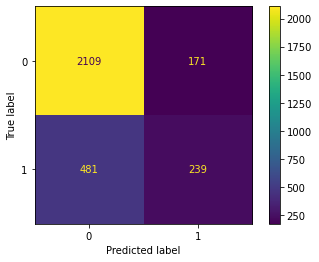

In [ ]:
#a more visual confusion matrix
metrics.plot_confusion_matrix(hrLogReg, X_test, y_test, values_format='.0f')

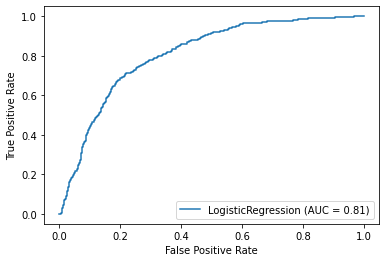

In [ ]:
# A single ROC curve
metrics.plot_roc_curve(hrLogReg, X_test, y_test)

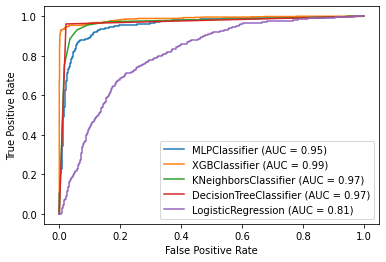

In [ ]:
# All ROC curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_roc_curve(i, X_test, y_test, ax=all_axes)


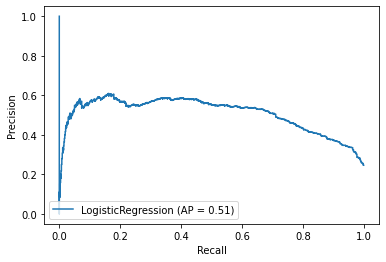

In [ ]:
# A single precision-recall curve
metrics.plot_precision_recall_curve(hrLogReg, X_test, y_test)

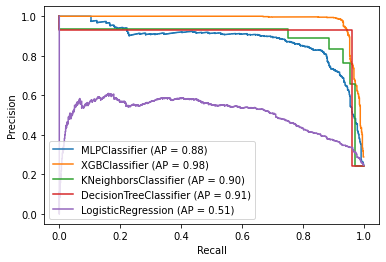

In [ ]:
# All precision-recall curves
all_axes = plt.gca()
for i in classifiers:
    metrics.plot_precision_recall_curve(i, X_test, y_test, ax=all_axes)

## Model explainability 

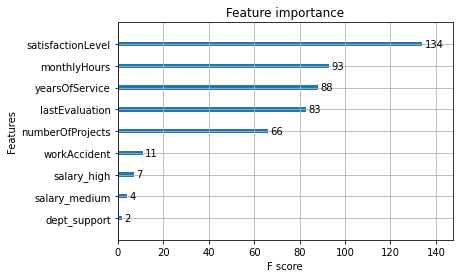

In [ ]:
# Built-in function in XGBoost library for input variable (input feature) importance
xgb.plot_importance(hrXGB)

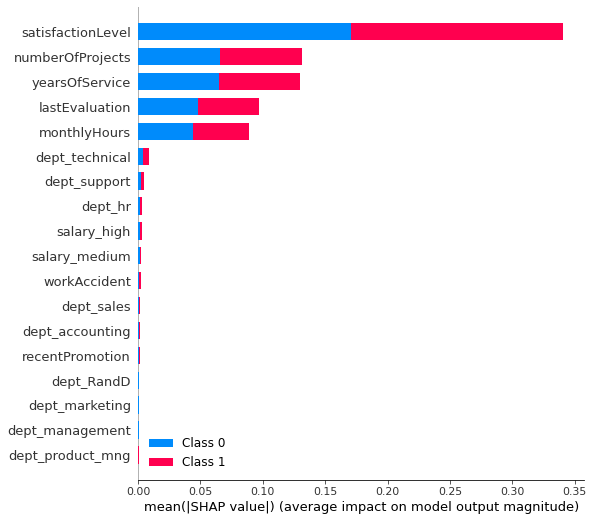

In [ ]:
import shap
# Using a SHAP explainer - works for tree-based models only
shapExplainer = shap.TreeExplainer(hrDecisionTree) 
shapExplainer_values = shapExplainer.shap_values(X_train)
shap.summary_plot(shapExplainer_values, X_train)